In [1]:
import pandas as pd
import models as md

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import eli5
from eli5.sklearn import PermutationImportance


Using TensorFlow backend.
//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/envs/learn-env/lib/python3.6/sit

##  Preprocessing stage

In [2]:
# kick=pd.read_csv('cleaned_data')

# kick['launched']=pd.to_datetime(kick['launched'])
# kick['deadline']=pd.to_datetime(kick['deadline'])

# kick_sampled=kick.sample(n=50000, random_state=1)

# col=['category','main_category', 'currency', 'country']
# kick_cat=kick_sampled[col]
# kick_dummy = pd.get_dummies(kick_cat, drop_first=True)
# kick_sampled=kick_sampled.drop(columns=col, axis=1)
# final_df_kick=pd.concat([kick_sampled,kick_dummy], axis=1)
# final_df_kick.info()

# final_df_kick.to_csv('kickstarters_with_dummy_sampled.csv', index=False)

In [3]:
final_dummy_kick = pd.read_csv('kickstarters_with_dummy_sampled.csv')
final_dummy_kick.shape

(50000, 216)

In [4]:
y = final_dummy_kick['classes_state']
X = final_dummy_kick.drop(columns=['classes_state','name','state','launched', 'deadline','ID','backers','usd_pledged_real','pledged_goal_diff'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 207 entries, usd_goal_real to country_US
dtypes: float64(1), int64(206)
memory usage: 79.0 MB


In [5]:
X_train, X_test, y_train, y_test = md.preprocessing(X,y)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/Desktop/InesaLisnic/projects/mod5project/Mod5_project/models.py:27: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_train_scaled = pd.DataFrame(data = stdscaler.transform(X_train), columns = X_train.columns)
/Users/flatironschool/Desktop/InesaLisnic/projects/mod5project/Mod5_project/models.py:28: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_test_scaled = pd.DataFrame(data = stdscaler.transform(

## Models

### Logistic Regression Model 

#### Baseline

In [39]:
def logregr(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)

    y_pred_test = logreg.predict(X_test)
    y_pred_train = logreg.predict(X_train)
    
    y_score = logreg.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
    
    print('Train Accuracy Score:',accuracy_score(y_train, y_pred_train), '\n',
                           'Test Accuracy Score:',accuracy_score(y_test, y_pred_test),'\n', 
                           'Train RocAuc Score:',roc_auc_score(y_train, y_pred_train),'\n',
                           'Test RocAuc Score:',roc_auc_score(y_test, y_pred_test),'\n', 
                           'AUC:',auc(fpr, tpr),'\n',
              classification_report(y_test, y_pred_test))
    
    

    return fpr, tpr, perm, thresholds

In [40]:
fpr, tpr, perm, thresholds = md.logregr(X_train, X_test, y_train, y_test)

Train Accuracy Score: 0.6443142857142857 
 Test Accuracy Score: 0.6298 
 Train RocAuc Score: 0.6493228402785001 
 Test RocAuc Score: 0.6348451001659257 
 AUC: 0.6940918629229298 
               precision    recall  f1-score   support

           0       0.73      0.61      0.66      8947
           1       0.53      0.66      0.59      6053

   micro avg       0.63      0.63      0.63     15000
   macro avg       0.63      0.63      0.63     15000
weighted avg       0.65      0.63      0.63     15000



ValueError: not enough values to unpack (expected 4, got 3)

In [6]:
fpr, tpr, perm, thresholds = md.logregr(X_train, X_test, y_train, y_test)

Train Accuracy Score: 0.6443142857142857 
 Test Accuracy Score: 0.6298 
 Train RocAuc Score: 0.6493228402785001 
 Test RocAuc Score: 0.6348451001659257 
 AUC: 0.6940918629229298 
               precision    recall  f1-score   support

           0       0.73      0.61      0.66      8947
           1       0.53      0.66      0.59      6053

   micro avg       0.63      0.63      0.63     15000
   macro avg       0.63      0.63      0.63     15000
weighted avg       0.65      0.63      0.63     15000



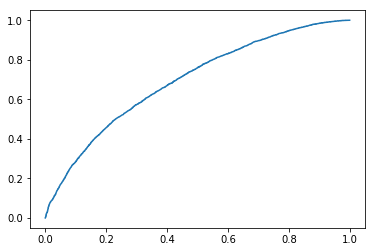

In [7]:
plt.plot(fpr,tpr)

In [8]:

# top_features_df=eli5.formatters.as_dataframe.explain_weights_df(perm, feature_names=list(X_train.columns), target_names=y_train)
# top_features_df.head()

In [9]:
# top_f=top_features_df.loc[top_features_df['weight']>=0.0001]

In [10]:
# list_f=list(top_f['feature'])
# X1=final_dummy_kick[list_f]
# y1=final_dummy_kick['classes_state']
# X1.shape

In [11]:
# X_train1, X_test1, y_train1, y_test1 = preprocessing(X1,y1)

In [12]:
# fpr1, tpr1, thresholds1, y_score1, y_pred_test1, y_pred_train1, perm1=logregr(X_train1, X_test1, y_train1, y_test1)
# print('Accuracy_score:',accuracy_score(y_test1, y_pred_test1))
# print(classification_report(y_test1, y_pred_test1))

In [13]:
# print(roc_auc_score(y_train1, y_pred_train1))
# print(roc_auc_score(y_test1, y_pred_test1))

### Decision Tree Model

#### Baseline

In [21]:
fpr1, tpr1, perm1, graph=decision_tree_model(X_train, X_test, y_train, y_test, 4, 100)

Train Accuracy Score: 0.6422 
 Test Accuracy Score: 0.6349333333333333 
 Train RocAuc Score: 0.6014186498813129 
 Test RocAuc Score: 0.594340432841741 
 AUC: 0.6442072430832515 
               precision    recall  f1-score   support

           0       0.66      0.80      0.72      8947
           1       0.57      0.38      0.46      6053

   micro avg       0.63      0.63      0.63     15000
   macro avg       0.61      0.59      0.59     15000
weighted avg       0.62      0.63      0.62     15000



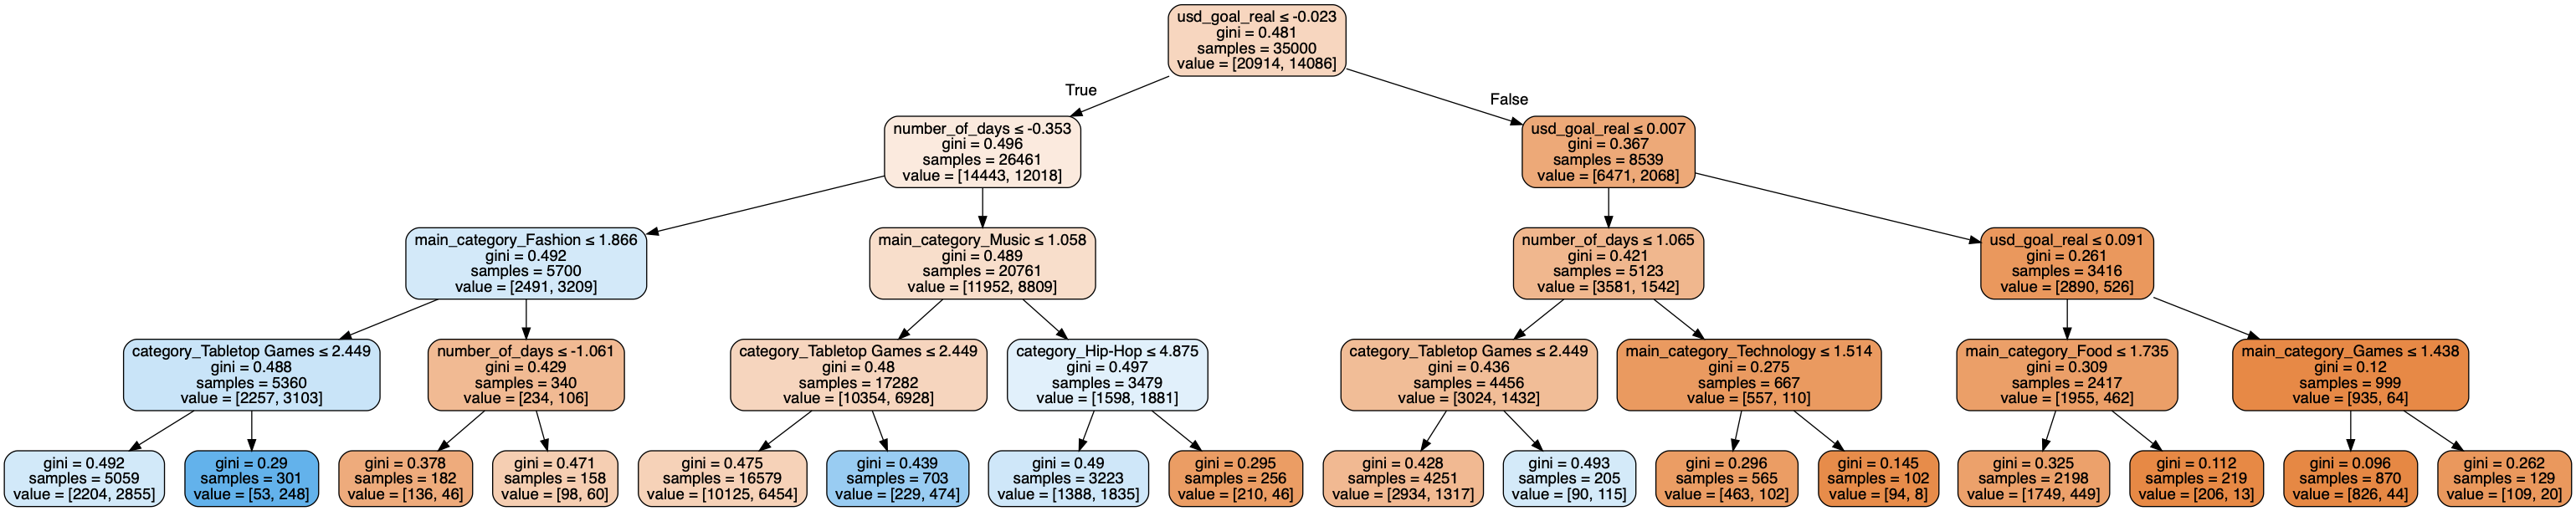

In [22]:
Image(graph.create_png())

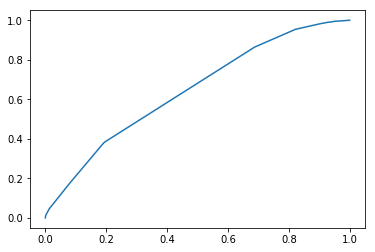

In [23]:
plt.plot(fpr1,tpr1)

In [16]:
y_train.value_counts()

0    20914
1    14086
Name: classes_state, dtype: int64

#### Optimising the model with GridSearchCV

In [35]:
def decision_tree_model(X_train, X_test, y_train, y_test, max_depth, min_samples_leaf, cv, ):
    model = DecisionTreeClassifier()

    param_grid = {'max_depth':max_depth,'min_samples_leaf':min_samples_leaf}

    opt_model = GridSearchCV(model,param_grid,cv=cv,scoring='roc_auc')
    opt_model.fit(X_train,y_train)
    best_model = opt_model.best_estimator_

    y_pred_train=best_model.predict(X_train)
    y_pred_test=best_model.predict(X_test)
    
    probas = best_model.predict_proba(X_test)
    fpr,tpr,thr = roc_curve(y_test,probas[:,1])
    plt.plot(fpr,tpr)

    print('Train Accuracy Score:',accuracy_score(y_train, y_pred_train),'\n',
             'Test Accuracy Score:',accuracy_score(y_test, y_pred_test),'\n', 
            'AUC:',auc(fpr, tpr),'\n',
              opt_model.best_params_, '\n',
             classification_report(y_test, y_pred_test))
    return

Train Accuracy Score: 0.6691428571428572 
 Test Accuracy Score: 0.6606666666666666 
 AUC: 0.6937918233577396 
 {'max_depth': 11, 'min_samples_leaf': 100} 
               precision    recall  f1-score   support

           0       0.68      0.82      0.74      8947
           1       0.61      0.43      0.51      6053

   micro avg       0.66      0.66      0.66     15000
   macro avg       0.65      0.62      0.62     15000
weighted avg       0.65      0.66      0.65     15000



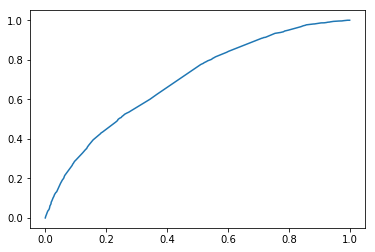

In [36]:
decision_tree_model(X_train, X_test, y_train, y_test, range(1,11+1), [100, 200, 300], 3)

### RandomForest Model

In [30]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
y_pred = tree_clf.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.6418
0.6010049986713429
[[7269 1678]
 [3695 2358]]
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      8947
           1       0.58      0.39      0.47      6053

   micro avg       0.64      0.64      0.64     15000
   macro avg       0.62      0.60      0.60     15000
weighted avg       0.63      0.64      0.62     15000



In [33]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [34]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [45]:
bagged_tree.score(X_train, y_train)

0.6556285714285714

In [46]:
bagged_tree.score(X_test, y_test)

0.6517333333333334

In [56]:
forest = RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=200)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=200,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
y_train_pred_f = forest.predict(X_train)
y_test_pred_f = forest.predict(X_test)

In [52]:
print(roc_auc_score(y_train, y_train_pred_f))
print(roc_auc_score(y_test, y_test_pred_f))

0.610121365291538
0.5909329738496565


In [53]:
forest.score(X_train, y_train)

0.6734857142857142

In [54]:
forest.score(X_test, y_test)

0.6549333333333334

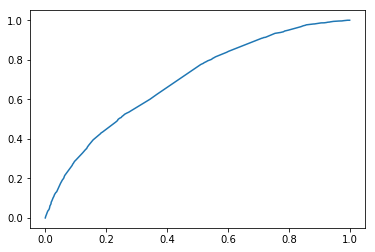

In [55]:
probas = best_model.predict_proba(X_test)
fpr,tpr,thr = roc_curve(y_test,probas[:,1])
plt.plot(fpr,tpr)